Exercicis d'algoritmes d'Agrupació.
- Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Important

Tingues en compte que prèviament et caldrà preparar el dataset.


In [1]:
# Carreguem pandas, numpy i la sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Carreguem la base de dades
Thai= pd.read_csv('Publicacions Facebook Thailandia.csv', parse_dates=['status_published'])

# Veiem una mostra de les dades
Thai.sample(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
475,246675545449582_1140401796076948,video,2016-12-15 02:19:00,358,5498,94,294,57,1,5,1,0,NaN,NaN,NaN,NaN
5285,614855718638584_779413045516183,video,2018-03-31 07:04:00,146,864,199,107,37,0,0,1,1,NaN,NaN,NaN,NaN
3268,134115277150304_210581372837027,photo,2017-12-30 03:21:00,74,5,1,67,3,4,0,0,0,NaN,NaN,NaN,NaN
2719,134115277150304_261725764389254,photo,2018-05-23 08:44:00,68,0,1,64,3,0,1,0,0,NaN,NaN,NaN,NaN
5537,614855718638584_708610832596405,video,2018-01-20 01:03:00,281,809,171,181,97,1,2,0,0,NaN,NaN,NaN,NaN


In [3]:
# Veiem el tipus de dades
Thai.dtypes

status_id                   object
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
Column1                    float64
Column2                    float64
Column3                    float64
Column4                    float64
dtype: object

In [4]:
Thai.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
# Finalment veiem la estrctura de la base de dades
Thai.shape

(7050, 16)

In [6]:
Thai.drop(['status_id','Column1','Column2','Column3','Column4'],axis=1,inplace = True)

Thai.sample(5)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2033,photo,2013-01-09 00:41:00,32,4,5,32,0,0,0,0,0
4218,video,2017-12-28 08:09:00,3,0,0,3,0,0,0,0,0
20,photo,2018-03-21 08:40:00,234,15,1,221,12,1,0,0,0
2032,photo,2013-01-09 02:50:00,58,5,0,58,0,0,0,0,0
2593,photo,2012-07-19 23:52:00,32,24,0,32,0,0,0,0,0


In [7]:
# La columna 'status_type' es un objecte. Veiem quins valors unics hi podem trobar:

print(Thai['status_type'].unique())

['video' 'photo' 'link' 'status']


In [8]:
# cambien el valors tipus string i els codifiquem per ordre alfabètic:
# 'link' = 0,'photo' = 1, 'status' = 2, 'video'= 3

Thai['status_type'].replace(['link','photo','status','video'],[0, 1, 2, 3], inplace=True)

In [9]:
# Voldrem veure si alguns del parametres de la data de publicació tene efecte per l'agrupació

# El mes de l'any
Thai['publi_month'] = Thai['status_published'].dt.month

# La setmana de l'any (semblant a l'anterior però amb més precisió)
Thai['publi_setmana_any'] = Thai['status_published'].dt.isocalendar().week

# El dia de la setmana (1 = dilluns, 7 = diumenge)
Thai['publi_dia_setmana'] = Thai['status_published'].dt.isocalendar().day

# Finalment voldrem l'hora de publicació amb els minuts expressats com decimals
Thai['publi_hora'] = Thai['status_published'].dt.hour
Thai['publi_minuts'] = Thai['status_published'].dt.minute
Thai['publi_hora_minuts'] = Thai['status_published'].dt.hour + (Thai['status_published'].dt.minute / 60)

Thai.drop(['publi_hora','publi_minuts'],axis=1,inplace = True)


In [10]:
# comprobem que ara tot es correcte

Thai.dtypes

status_type                   int64
status_published     datetime64[ns]
num_reactions                 int64
num_comments                  int64
num_shares                    int64
num_likes                     int64
num_loves                     int64
num_wows                      int64
num_hahas                     int64
num_sads                      int64
num_angrys                    int64
publi_month                   int64
publi_setmana_any            UInt32
publi_dia_setmana            UInt32
publi_hora_minuts           float64
dtype: object

In [11]:
Thai.sample(5)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publi_month,publi_setmana_any,publi_dia_setmana,publi_hora_minuts
6187,1,2018-05-09 08:45:00,1957,124,10,1908,27,21,1,0,0,5,19,3,8.750000
1200,1,2015-05-20 00:13:00,2118,6,0,2118,0,0,0,0,0,5,21,3,0.216667
5102,2,2018-05-23 07:52:00,15,0,0,15,0,0,0,0,0,5,21,3,7.866667
798,3,2016-04-12 03:54:00,39,5,1,39,0,0,0,0,0,4,15,2,3.900000
3661,3,2017-08-11 02:53:00,28,68,7,23,5,0,0,0,0,8,32,5,2.883333


#### Escalarem la mostra fent servir el StandardScaler

In [12]:
# fem un llistat de les columnes que utilitzarem
features = ['status_type','num_reactions','num_comments','num_shares','num_likes',
            'num_loves','num_wows','num_hahas','num_sads','num_angrys','publi_month',
            'publi_setmana_any','publi_dia_setmana','publi_hora_minuts']

#generem una taula amb els valors de les columnes seleccionades
x_Thai = Thai.loc[:, features].values

# Fem una taula amb els valors de les y
# y_Thai = Thai.loc[:,['status_type']].values

# scalem les x
x_Thai_scaled = StandardScaler().fit_transform(x_Thai)

# I ho mostrem. Fem servir aquest codi perque ara les x_Thai en una numpy array i ho volem mostrar con una DataFrame de pandas
pd.DataFrame(data = x_Thai_scaled, columns = features).head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publi_month,publi_setmana_any,publi_dia_setmana,publi_hora_minuts
0,1.374288,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,-0.718661,-0.688768,1.483087,-0.330879
1,-0.748106,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,-0.688768,0.986235,2.091085
2,1.374288,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,-0.718661,-0.688768,0.986235,-0.289911
3,-0.748106,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,-0.688768,0.986235,-0.839371
4,-0.748106,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,-0.688768,-0.504323,-0.711646


#### Ara determinarem els 2 PCA 

In [13]:
# Aqui determinem que volem tenir nomes dos PCA, per fer representacions 2D
pca = PCA(n_components=2)

# la transformació
principalComponents = pca.fit_transform(x_Thai_scaled)

# Fem un dataframe amb els dos PCE determinats
Thai_2PCA = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# i ho mostrem
Thai_2PCA.head(5)

,principal component 1,principal component 2
0,2.642074,0.493197
1,-0.718866,1.179420
2,0.548499,0.661591
3,-0.711948,0.920820
4,-0.501434,0.988134


#### PCA Projection to 2D

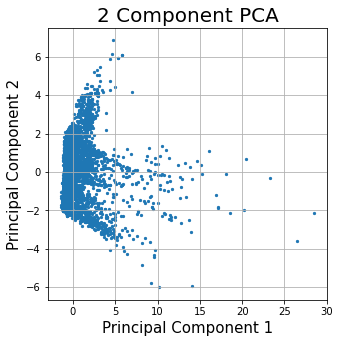

In [14]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           s = 5)

ax.grid()

### K-means

In [15]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

kmeans.fit(x_Thai_scaled)

KMeans(init='random', n_clusters=3, random_state=42)

In [17]:
# Calculem el SSE (suma del quadrat dels errors, sum of the squared error) mes baix 
kmeans.inertia_

72148.40484848767

In [18]:
# I aquí trobem l'ubicacio final dels centroids
kmeans.cluster_centers_

array([[-2.77619313e-03,  1.21067466e-01, -1.37314026e-01,
        -1.24120076e-01,  1.36316768e-01, -1.07790345e-01,
        -5.02251177e-02, -7.98067619e-02, -9.25702763e-02,
        -7.42118822e-02, -8.05679684e-01, -8.09923751e-01,
         1.38310283e-02,  2.95523908e-02],
       [-1.11934726e-01, -2.51299985e-01, -1.45336772e-01,
        -1.72063916e-01, -2.39829524e-01, -1.75809116e-01,
        -1.01057043e-01, -1.08313315e-01, -3.30405355e-02,
        -9.37275126e-02,  9.48459744e-01,  9.53939626e-01,
        -1.53087138e-02, -2.71104932e-02],
       [ 1.26892085e+00,  1.19570459e+00,  3.38390063e+00,
         3.50694412e+00,  8.71342197e-01,  3.33613957e+00,
         1.76527503e+00,  2.22933872e+00,  1.56601509e+00,
         1.99603393e+00,  1.58972972e-02,  1.06535356e-02,
        -1.09941854e-02, -8.51619266e-02]])

In [19]:
# I el numero d'iteracions necesaries pero convergir
kmeans.n_iter_

14

In [20]:
# Les 10 primeres etiquetes

kmeans.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Mètode elbow per a determinar el numero de clústers

In [21]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Aqui obtindrem a llista del valors de SSE per cada k (ente 1 i 15)
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_Thai_scaled)
    sse.append(kmeans.inertia_)

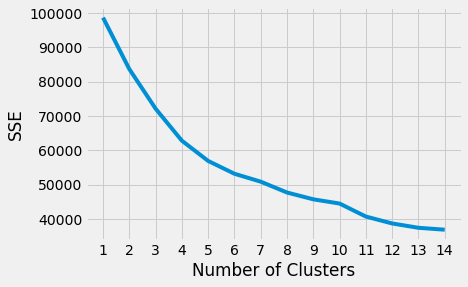

In [22]:
# fem una gràfica SSE vs numero de clusters

plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [23]:
# de la gràfica anterior semblaría que el punt colze estaria en 4. 
# De totes maneres ho calculem fent servir el package kneed
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")

kl.elbow

5

In [24]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42)

kmeans.fit(x_Thai_scaled)

KMeans(init='random', n_clusters=5, random_state=42)

In [25]:
kmeans.inertia_

56910.47535608955

In [26]:
kmeans.labels_[:10]

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [27]:
Thai_labels = kmeans.labels_
Thai_labels

array([0, 0, 0, ..., 4, 4, 4])

In [28]:
Thai_cluster = pd.DataFrame(Thai_labels, columns = ['Cluster'])


In [29]:
Thai_cluster.head()

,Cluster
0,0
1,0
2,0
3,0
4,0


In [30]:
Thai_2PCA.insert(0, "Cluster", Thai_cluster, True)

In [31]:
Thai_2PCA.head()

,Cluster,principal component 1,principal component 2
0,0,2.642074,0.493197
1,0,-0.718866,1.179420
2,0,0.548499,0.661591
3,0,-0.711948,0.920820
4,0,-0.501434,0.988134


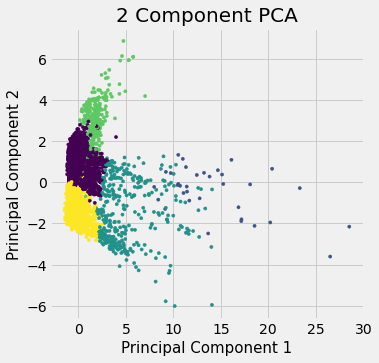

In [32]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Cluster'],
           s = 10);

#### Comentari:
Sembla que l'agrupació ha sortit força raonable i els 5 grups tenen bastant sentit

- Exercici 2

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

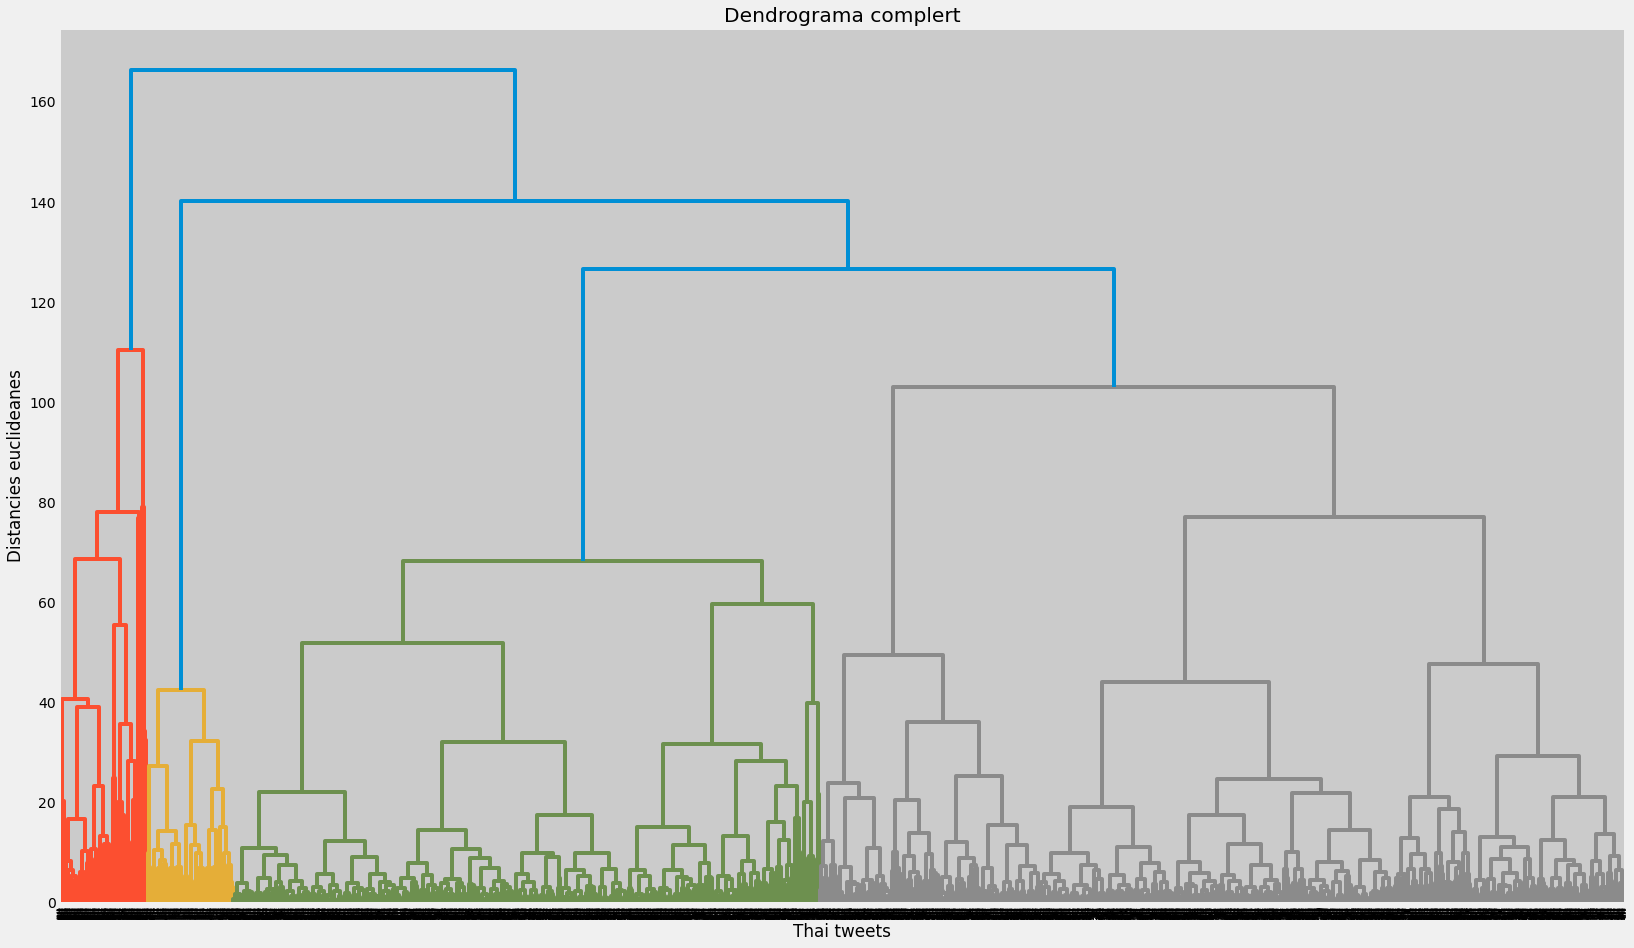

In [33]:
# Primer dibuixem el dendograma, a veure que surt

import scipy.cluster.hierarchy as sch

fig = plt.figure(figsize = (25,15))

dendrogram = sch.dendrogram(sch.linkage(x_Thai_scaled, method = 'ward'))
plt.title('Dendrograma complert')
plt.xlabel('Thai tweets')
plt.ylabel('Distancies euclideanes')
plt.show()

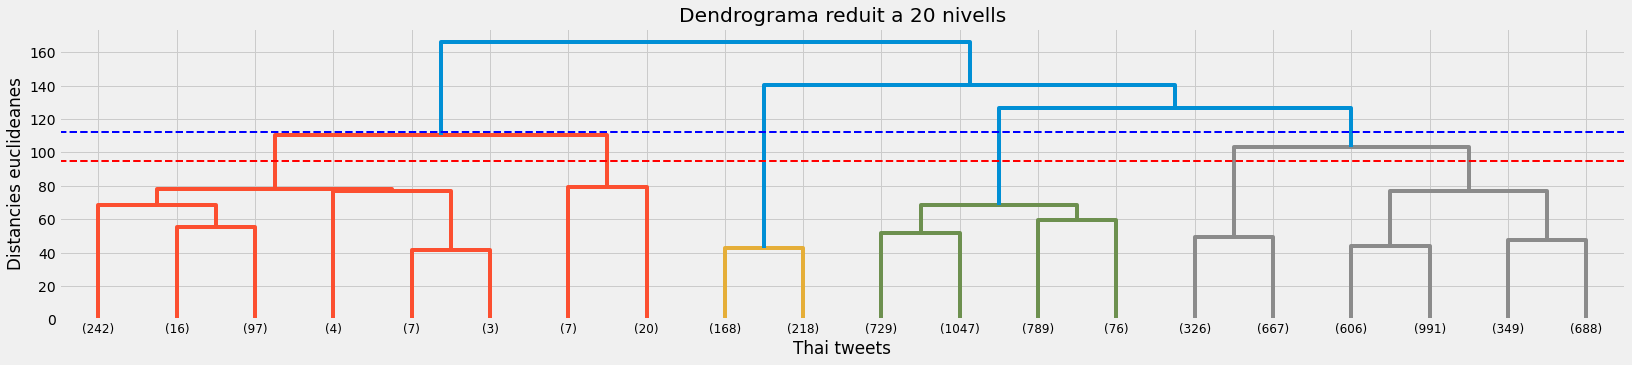

In [34]:
# Fem el mateix dibuix, però reduim el numero de nivells, per tal que que sigui més comprensible
fig = plt.figure(figsize = (25,5))

dendrogram = sch.dendrogram(sch.linkage(x_Thai_scaled, method = 'ward'), truncate_mode='lastp', p=20)
plt.axhline(y= 112, color = 'b', linestyle = '--',lw = 2)
plt.axhline(y= 95, color = 'r', linestyle = '--', lw = 2)
plt.title('Dendrograma reduit a 20 nivells')
plt.xlabel('Thai tweets')
plt.ylabel('Distancies euclideanes')
plt.show()

#### Comentari 
No acabo d'entendre massa be el mètode de la linea per determinar el número òptim de clusters, però sembla que serien 5 o 6 clústers.

In [35]:
# Ho fem amb 5 clusters
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(x_Thai_scaled)
labels = model.labels_

labels

array([0, 0, 0, ..., 0, 3, 3], dtype=int64)

In [36]:
#Afegirem els clusters al dataframe amb els PCA1 i 2
Thai_hirarchical = pd.DataFrame(Thai_labels, columns = ['Hierarchical'])

Thai_2PCA.insert(0, "Hierarchical", Thai_hirarchical, True)

Thai_2PCA.head()

,Hierarchical,Cluster,principal component 1,principal component 2
0,0,0,2.642074,0.493197
1,0,0,-0.718866,1.179420
2,0,0,0.548499,0.661591
3,0,0,-0.711948,0.920820
4,0,0,-0.501434,0.988134


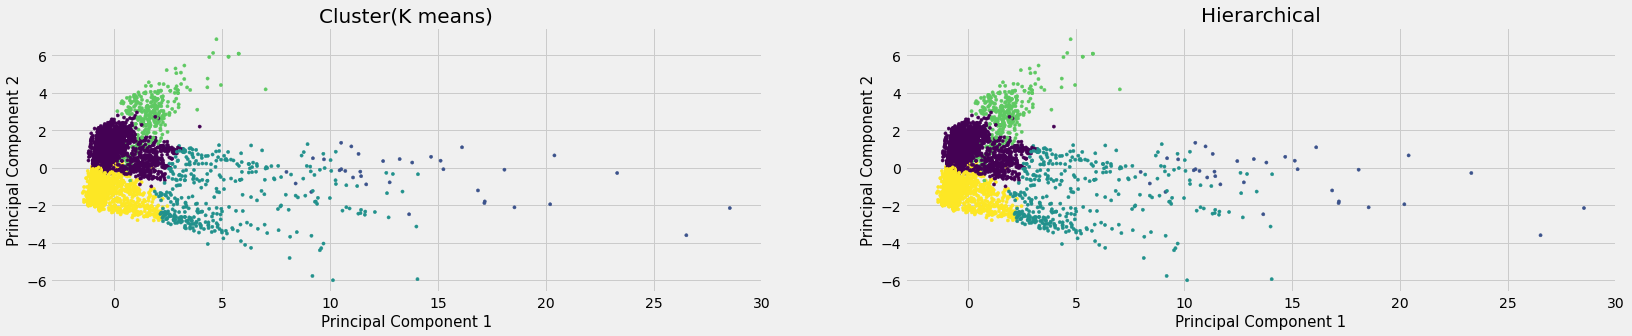

In [37]:
# Ho veiem gràficament i compararem els resultats dels dos anàlisi un al costat de l'altre
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(2,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Cluster(K means)', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Cluster'],
           s = 10);

ax = fig.add_subplot(2,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hierarchical', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Hierarchical'],
           s = 10);

#### Comentari
Els dos resultats semblen idèntics

In [38]:
# Fem una columna que ens mostri si els agrupaments son similars entre K means i Hierarchical =1) o si son diferents (=0)
Thai_2PCA['Similar']  = np.where(Thai_2PCA['Hierarchical'] == Thai_2PCA['Cluster'], 1, 0)

Thai_2PCA.head()

,Hierarchical,Cluster,principal component 1,principal component 2,Similar
0,0,0,2.642074,0.493197,1
1,0,0,-0.718866,1.179420,1
2,0,0,0.548499,0.661591,1
3,0,0,-0.711948,0.920820,1
4,0,0,-0.501434,0.988134,1


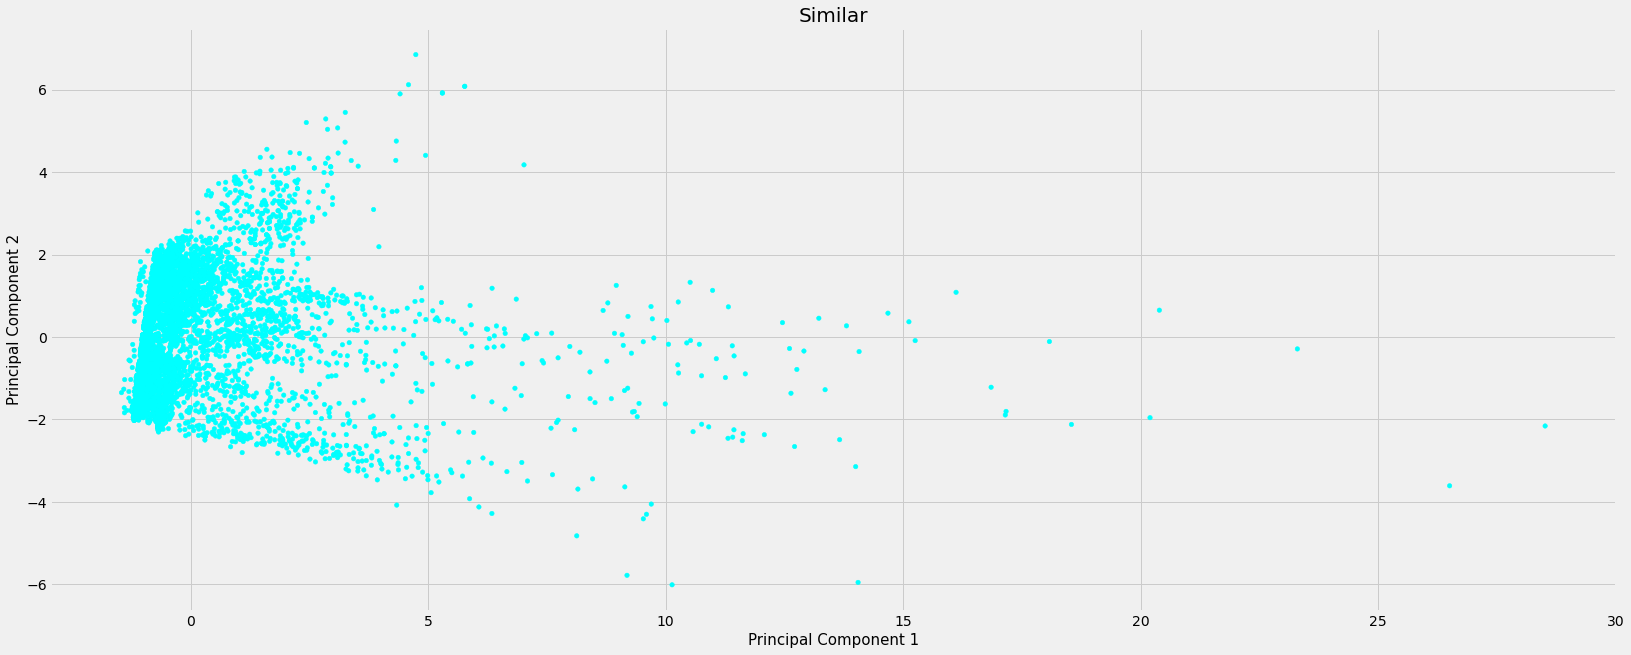

In [39]:
# Ho mostrem gràficament. La diferencia de color vindrà donada per la diferencia entre els dos tipus d'agrupaments

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Similar', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Similar'], cmap='cool',
           s = 20);

#### Comentari
No es veu cap diferència.

In [40]:
# Ara ho farem amb 6 clusters

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(x_Thai_scaled)
Thai_labels6 = model.labels_



In [41]:
# I novament afegim les categories al dataframe dels PCA
Thai_hirarchical6 = pd.DataFrame(Thai_labels6, columns = ['Hierarchical6'])

Thai_2PCA.insert(0,"Hierarchical6", Thai_hirarchical6, True)

Thai_2PCA.head()

,Hierarchical6,Hierarchical,Cluster,principal component 1,principal component 2,Similar
0,0,0,0,2.642074,0.493197,1
1,0,0,0,-0.718866,1.179420,1
2,0,0,0,0.548499,0.661591,1
3,0,0,0,-0.711948,0.920820,1
4,0,0,0,-0.501434,0.988134,1


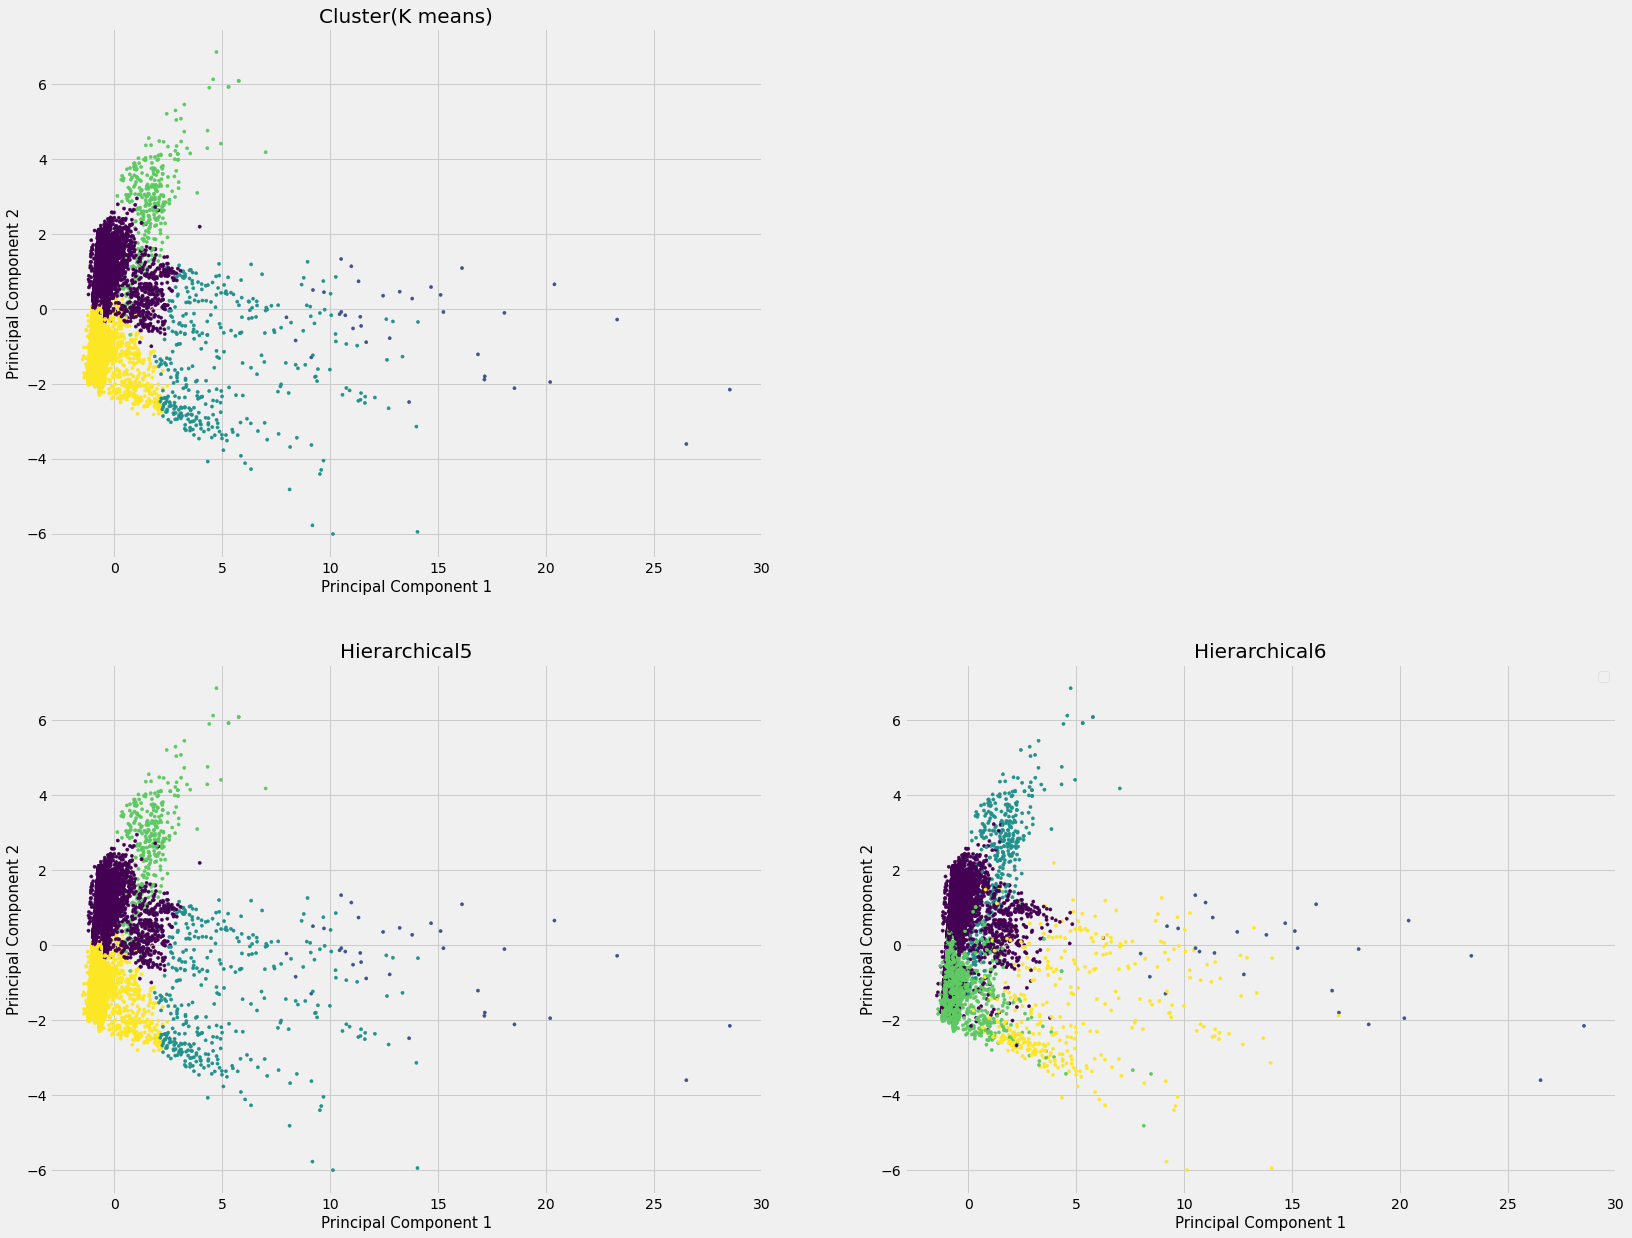

In [42]:
# Tornem a veure-ho gràficament, ara amb els tres resultats
fig = plt.figure(figsize = (25,20))
ax = fig.add_subplot(2,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Cluster(K means)', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Cluster'],
           s = 10);

ax = fig.add_subplot(2,2,3) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hierarchical5', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Hierarchical'],
           s = 10);

ax = fig.add_subplot(2,2,4) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hierarchical6', fontsize = 20)
plt.legend(Thai_2PCA['Hierarchical6'])

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Hierarchical6'],
           s = 10);

In [43]:
# Tornem a fer una columna que ens mostri si els agrupaments son similars entre K means i Hierarchical6 (=1) o si son diferents (=0)
Thai_2PCA['Similar6']  = np.where(Thai_2PCA['Hierarchical6'] == Thai_2PCA['Cluster'], 1, 0)

Thai_2PCA.head()

,Hierarchical6,Hierarchical,Cluster,principal component 1,principal component 2,Similar,Similar6
0,0,0,0,2.642074,0.493197,1,1
1,0,0,0,-0.718866,1.179420,1,1
2,0,0,0,0.548499,0.661591,1,1
3,0,0,0,-0.711948,0.920820,1,1
4,0,0,0,-0.501434,0.988134,1,1


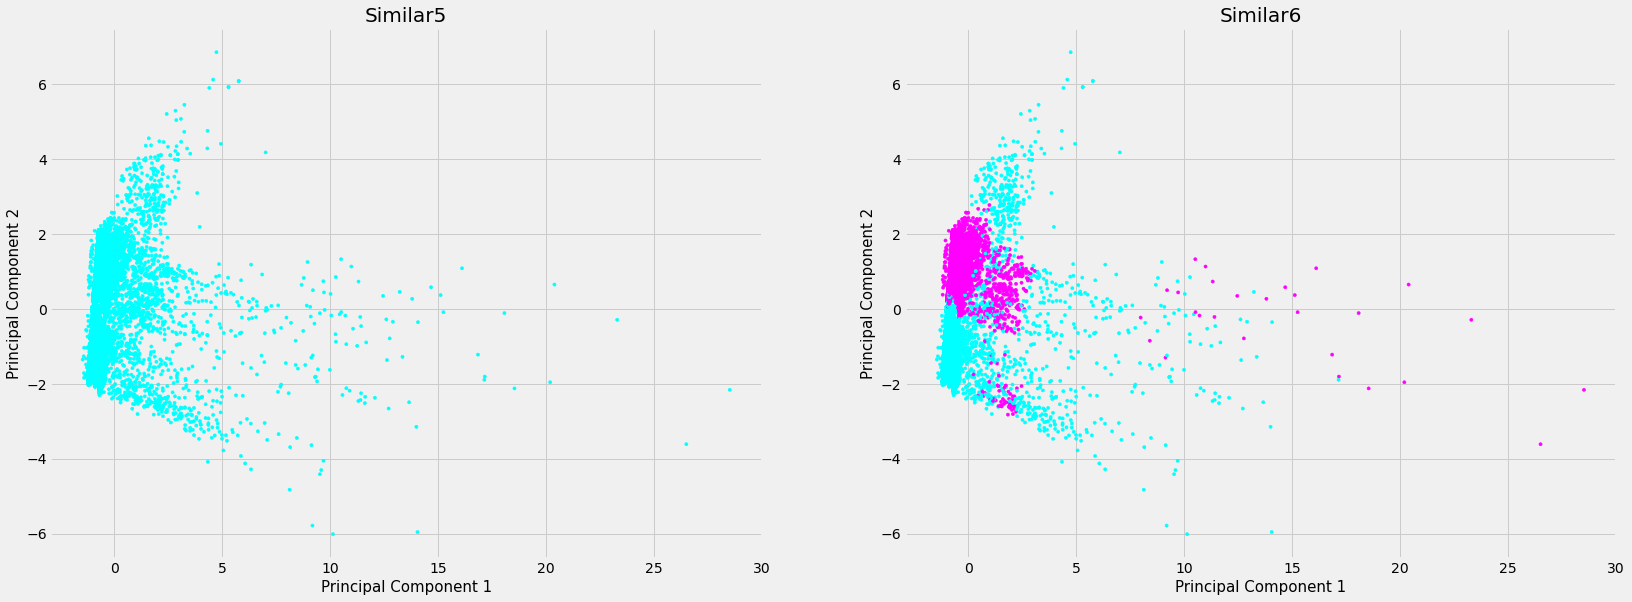

In [44]:
# Ho mostrem gràficament. La diferencia de color vindrà donada per la diferencia entre els dos tipus d'agrupaments

fig = plt.figure(figsize = (25,20))
ax = fig.add_subplot(2,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Similar5', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Similar'],cmap='cool',
           s = 10);

ax = fig.add_subplot(2,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Similar6', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           c=Thai_2PCA['Similar6'],cmap='cool',
           s = 10);

#### Comentari
Mostra una diferencia marcada a la zona (0, (0,2)). Això es deu a que en el Hierarchical6 hem fet una nova categoria.
Les altres diferencies es troben a la zona ((2,-2),(7,30)). És en aquesta zona on s'ha generat el cluster diferent del que teniem abans.  
També es veuen uns canvis a la zona (2,-2).  
En general sembla que amb 6 clusters hi ha mes solapament (veure gràfica anterior)

- Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [45]:
# Fem una llista per tots el valors de silhouette que calcularem
silhouette_coefficients = []

# Fem un loop per calcular els coeficients de silhouette. 
# Començarem pel 3 ja que amb 2 dona un valor significativament més alt que la resta
# I voldriem veure en detall que pasa amb 3 o més clústers
for k in range(3, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_Thai_scaled)
    score = silhouette_score(x_Thai_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

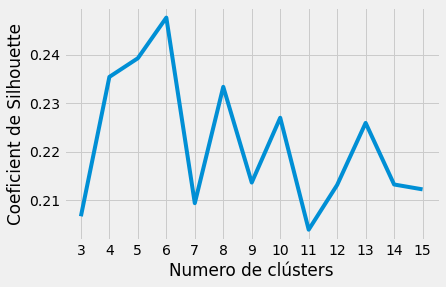

In [46]:
# plt.style.use("fivethirtyeight")
plt.plot(range(3, 16), silhouette_coefficients)
plt.xticks(range(3, 16))
plt.xlabel("Numero de clústers")
plt.ylabel("Coeficient de Silhouette")
plt.show()

#### Comentari
- Els valors de silhoette van de 1 (el millor) a -1 (el pitjor)  
- Valors de 0 indiquen solapament del clústers  
Aquest anàlisi dóna valors força baixos, la cual cosa indica solapament  
Abans vam calcular el elbow point, que va donar un valor de 4, així que sembla que 5 podriem donar per bo.  
En qualsevol cas la diferencia no sembla massa gran

#### Nota final

El fet d'obtenir els cluster no em diu gaire cose de les dades amb les que he treballat.  
Faig uns boxplots per veure quin aspecte tenen els diferents clustes.

In [47]:
Thai_graf = pd.DataFrame(data = x_Thai_scaled, columns = features)
Thai_graf.insert(0, "Cluster", Thai_cluster, True)
Thai_graf.shape

(7050, 15)

In [48]:
Thai_graf.head()

,Cluster,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publi_month,publi_setmana_any,publi_dia_setmana,publi_hora_minuts
0,0,1.374288,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,-0.718661,-0.688768,1.483087,-0.330879
1,0,-0.748106,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,-0.688768,0.986235,2.091085
2,0,1.374288,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,-0.718661,-0.688768,0.986235,-0.289911
3,0,-0.748106,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,-0.688768,0.986235,-0.839371
4,0,-0.748106,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,-0.688768,-0.504323,-0.711646


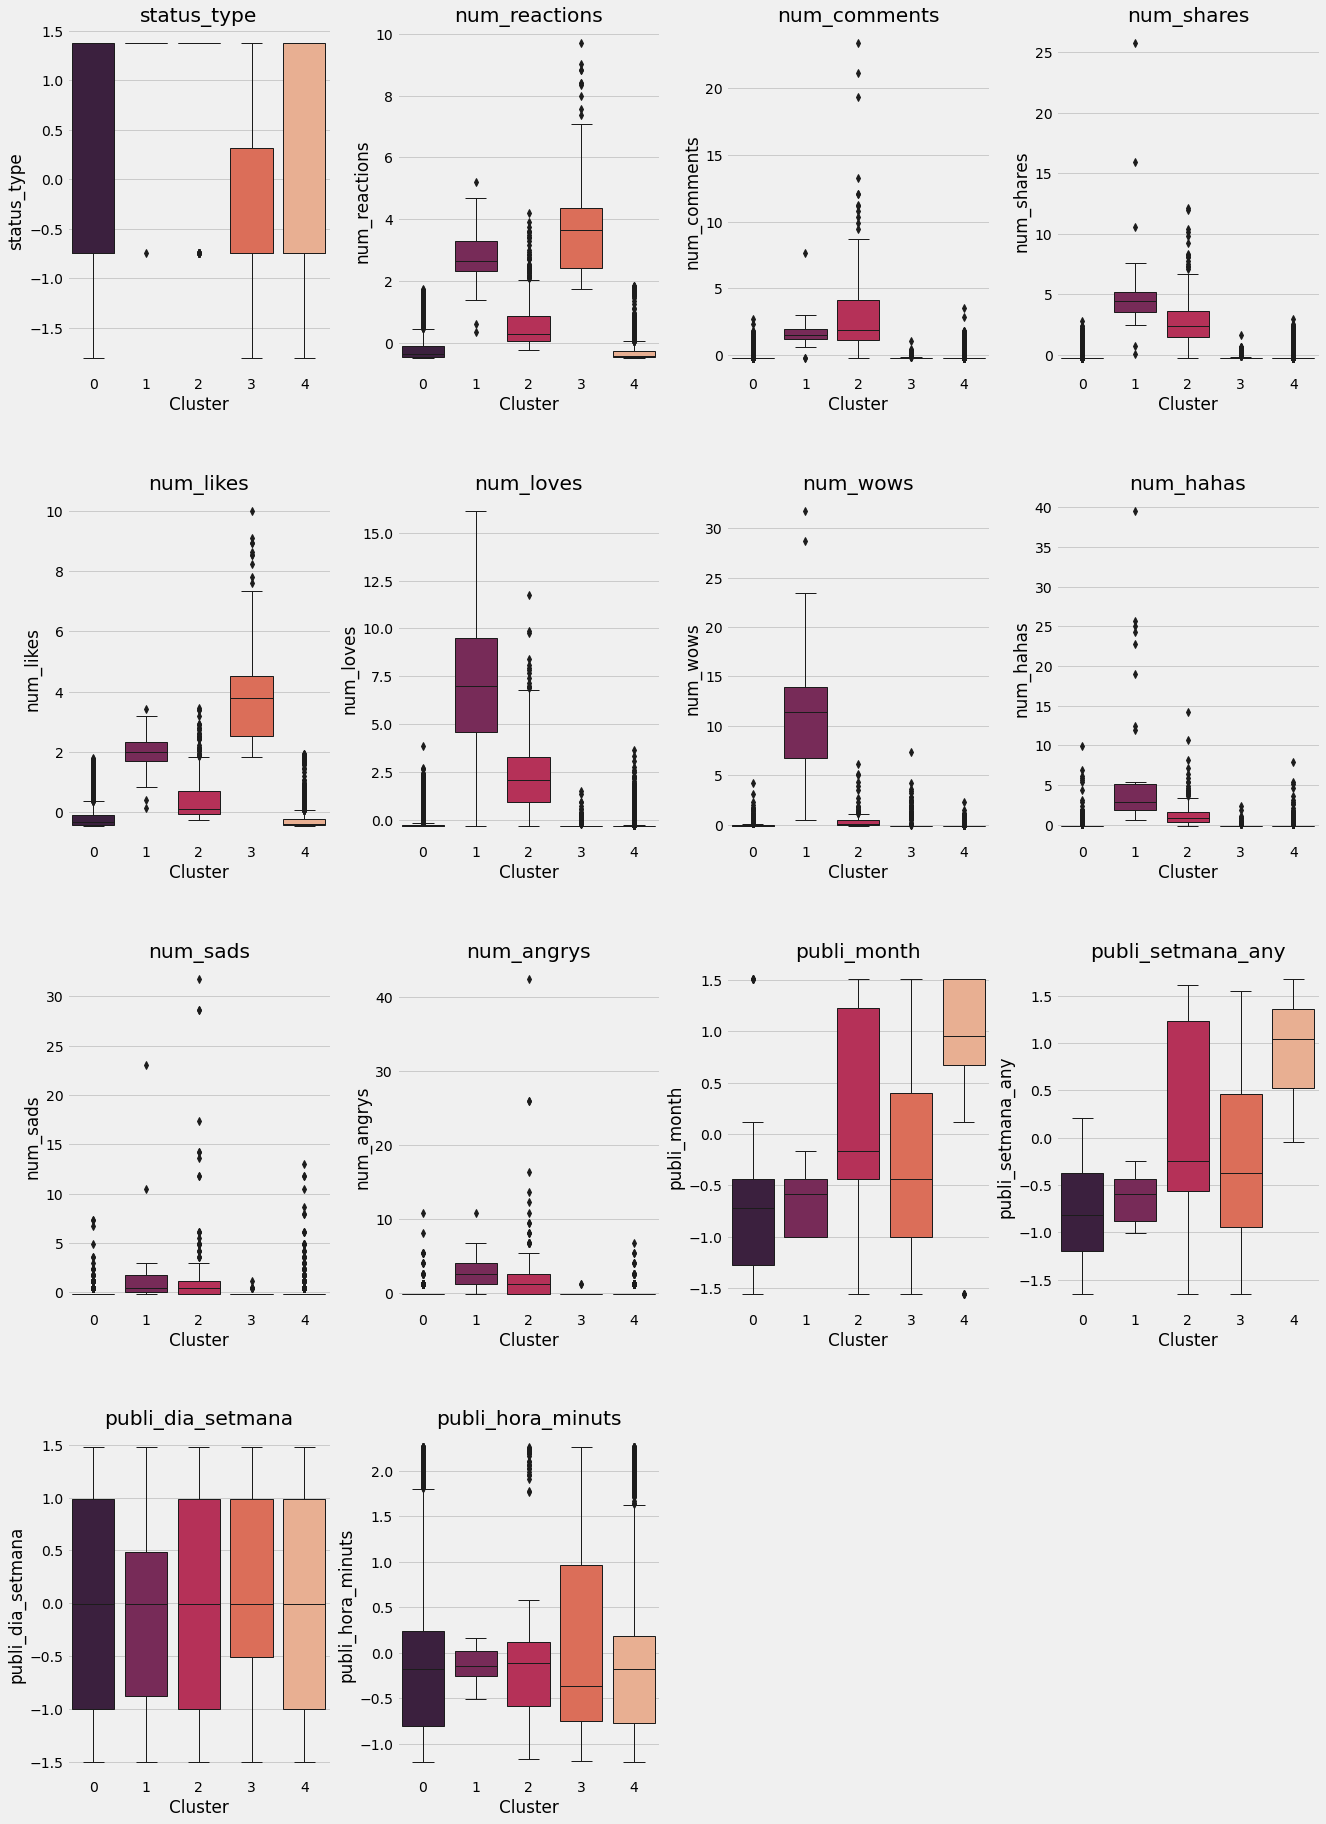

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns

#llistat de columnes que mirarem en funció del grup
features = ['status_type','num_reactions','num_comments','num_shares',
            'num_likes','num_loves','num_wows','num_hahas','num_sads',
            'num_angrys','publi_month','publi_setmana_any',
            'publi_dia_setmana','publi_hora_minuts']
contatge = 1

plt.figure(figsize=(20,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=.35)

for caract in features:
    plt.subplot(4,4,contatge)
    sns.boxplot(x = 'Cluster', y = caract, data = Thai_graf, palette = 'rocket',linewidth =1)
    plt.title(caract)
    contatge += 1
    

#### Ho he fet amb valors estandaritzats
Això no es massa explicatiu

Ara ho faig amb valors reals, no estandaritzats

In [50]:
# Thai_graf = pd.DataFrame(data = x_Thai_scaled, columns = features)
Thai.insert(0, "Cluster", Thai_cluster, True)
Thai.head()

,Cluster,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publi_month,publi_setmana_any,publi_dia_setmana,publi_hora_minuts
0,0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,4,16,7,6.000000
1,0,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,4,16,6,22.750000
2,0,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,4,16,6,6.283333
3,0,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,4,16,6,2.483333
4,0,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,4,16,3,3.366667


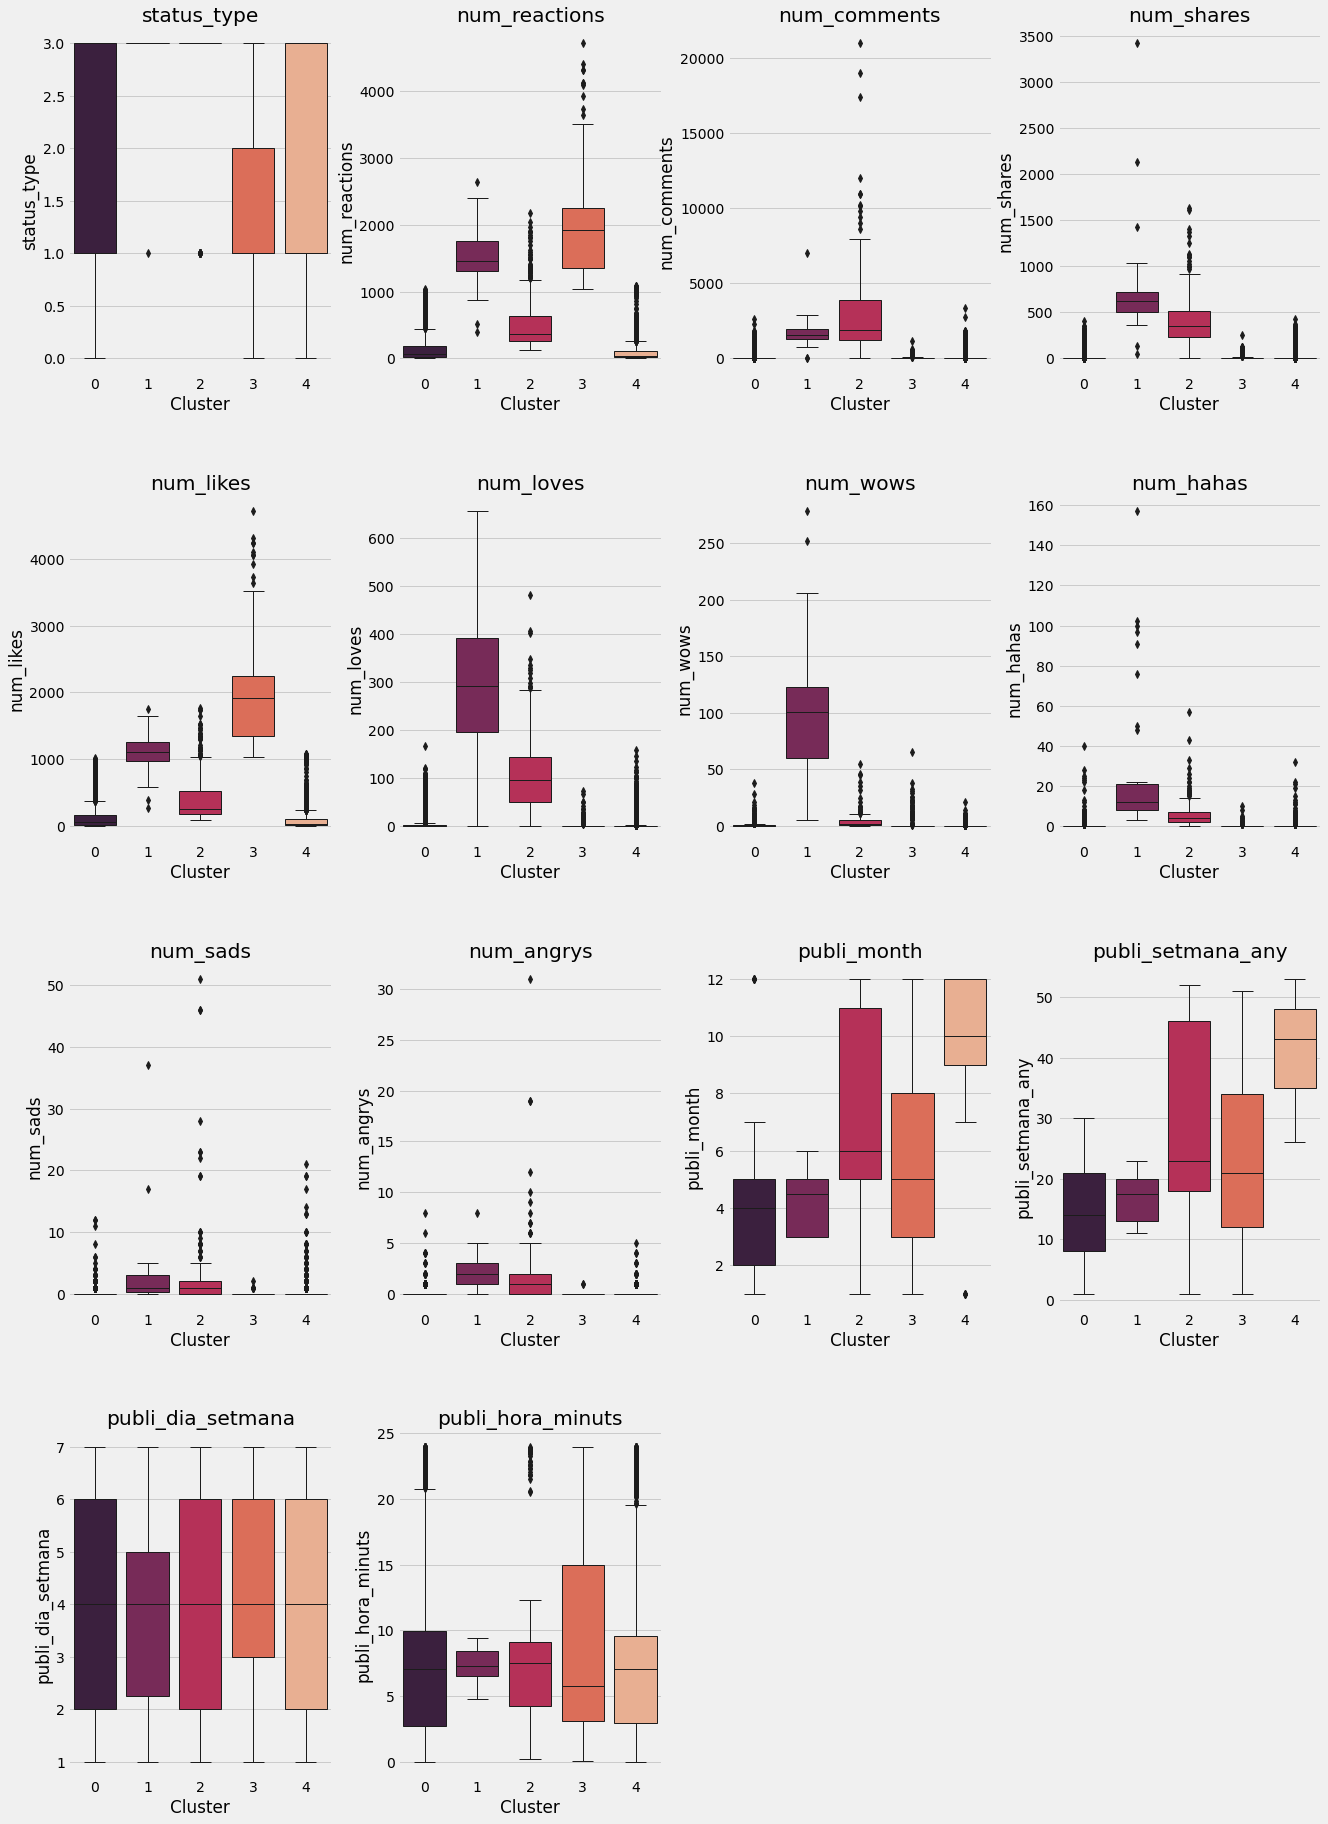

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns

#llistat de columnes que mirarem en funció del grup
features = ['status_type','num_reactions','num_comments','num_shares',
            'num_likes','num_loves','num_wows','num_hahas','num_sads',
            'num_angrys','publi_month','publi_setmana_any',
            'publi_dia_setmana','publi_hora_minuts']
contatge = 1

plt.figure(figsize=(20,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=.35)

for caract in features:
    plt.subplot(4,4,contatge)
    sns.boxplot(x = 'Cluster', y = caract, data = Thai, palette = 'rocket',linewidth =1)
    plt.title(caract)
    contatge += 1
   

#### Comentari

El resultat es el mateix, però ara els números tenen més sentit.

#### Uns comentaris finals
Es interessant que tant el K mean com l'anàlisi jeràrquic donin els mateixos reultats  
Hi hauria marge per analitzar les dades amb algun gir interessant:  
- Podria haber una correlació entre els 'reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas', 'sads' i 'angrys'. Pot ser seria interessant estudiar la correlació entre totes aquestes dades, i veure si en podriem descartar algunes si els coeficients de correlacion son molt alts.
- Les dades de 'publi_month' i 'publi_setmana_any' donen la mateixa informació, encara que el detall sigui different. Podria passar que això estigues pessant el doble del que realment hauria de ser

#### Adenda
Anem a repetir l'algoritme K means amb le base de dades reduida, a veure que en surt.

In [52]:
# Fem un DataFrame reduit amb les variables que separen millor les classes. 
# Fer-ho amb totes les variables dona uns grafic massa petits e incomprensibles
Thai_reduit = Thai[['num_reactions','num_comments','num_shares',
            'num_likes','num_loves','num_wows','num_hahas','num_sads',
            'num_angrys']].copy()


#### Veiem les correlacions amb scatter plots

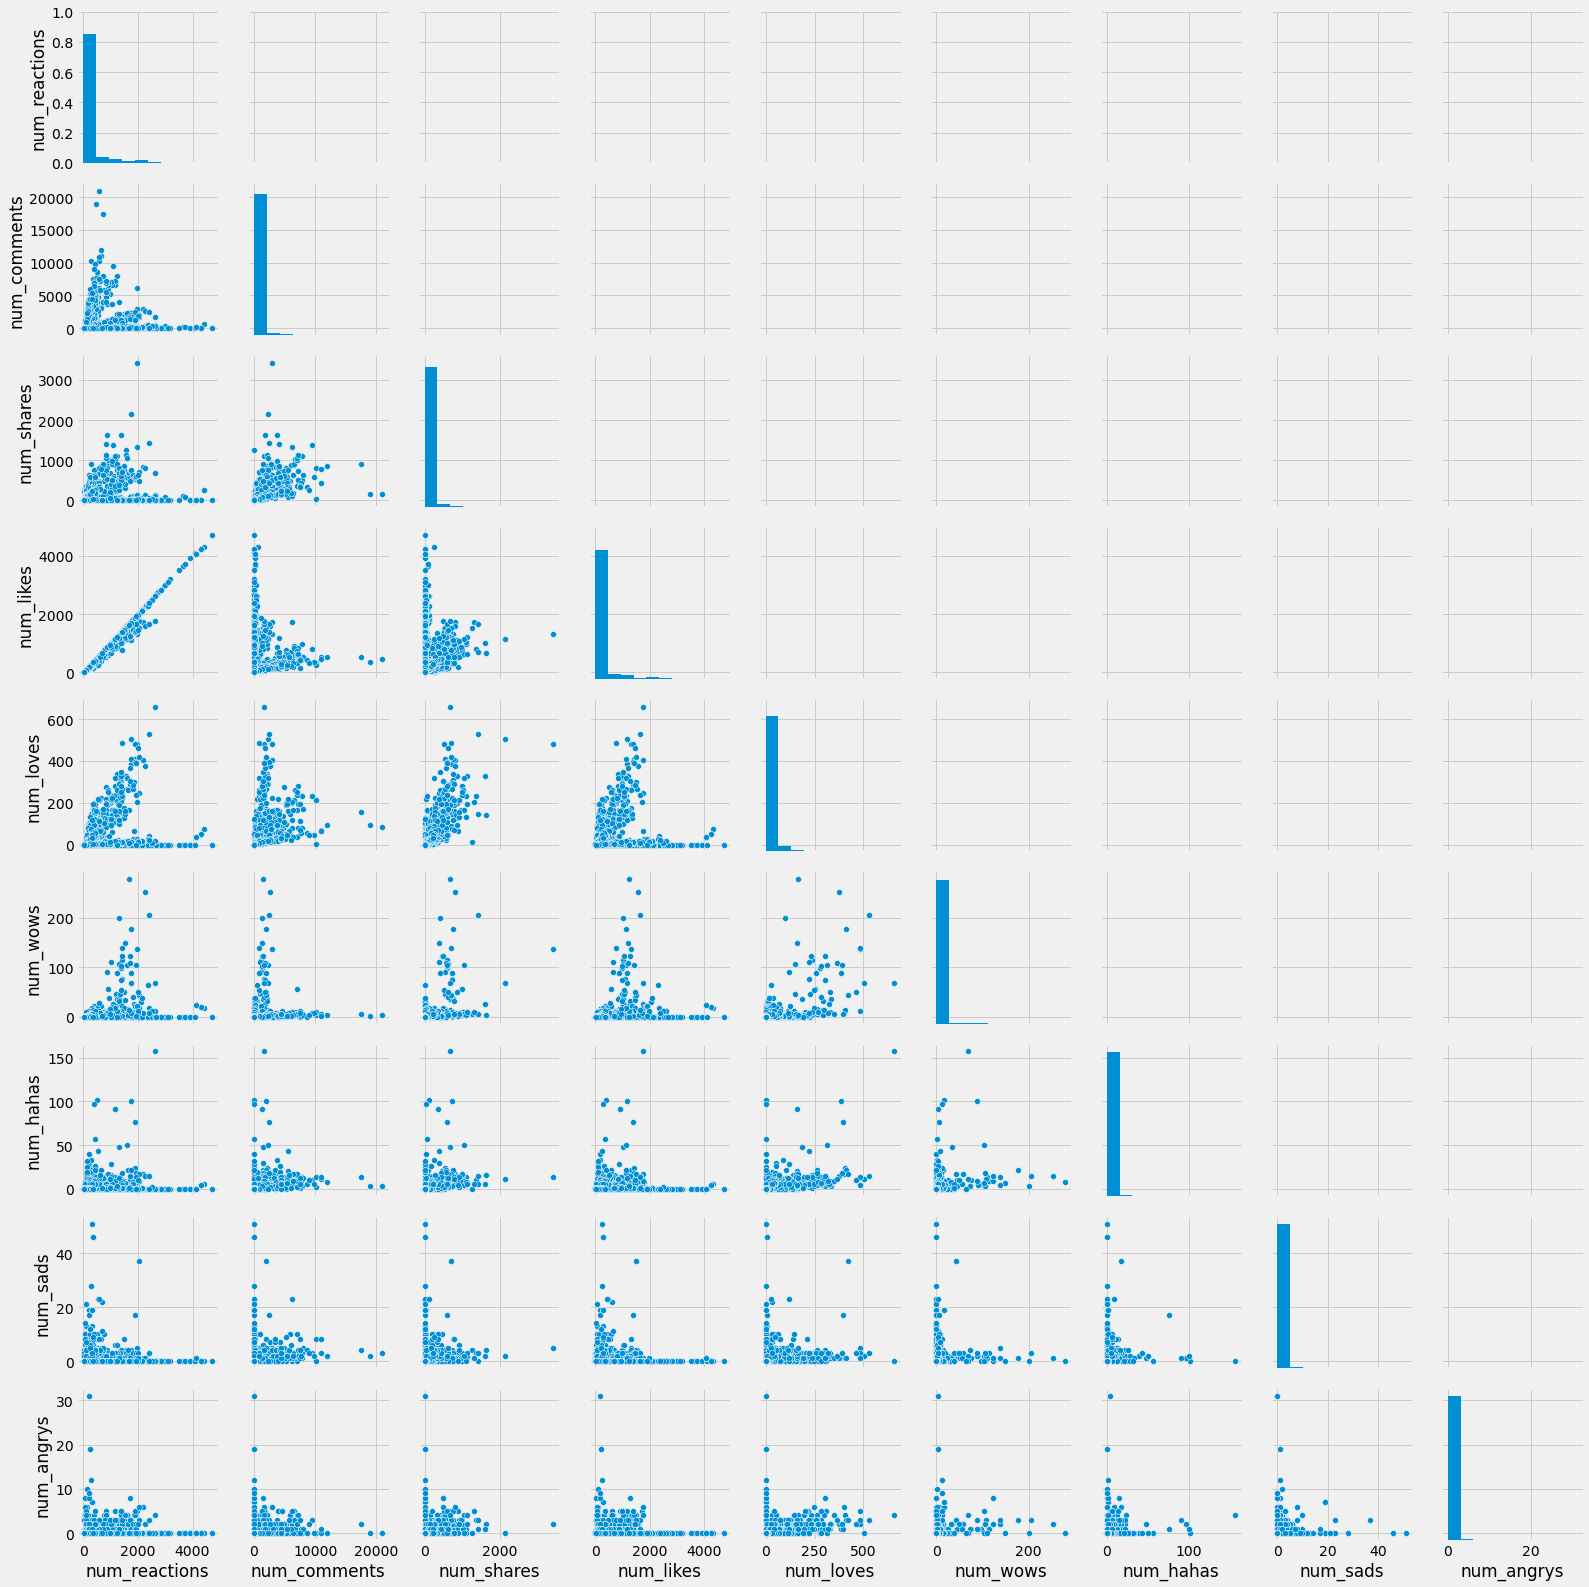

In [53]:
graph = sns.PairGrid(Thai_reduit, palette='dark')
graph = graph.map_diag(plt.hist)
graph = graph.map_lower(sns.scatterplot)
# graph = graph.map_lower(sns.kdeplot)
plt.show()

#### Comentari als scatter plots
Hi ha una correlació molf forta ente el numero de número de 'comments' i el de 'likes'. Treurem aquest últim i la setmana de l'any, a veure si surten resultats diferents  
També descartem la columna 'publi_setmana_any', pel que comentava abans

In [54]:
Thai2 = Thai[['status_type','num_reactions','num_comments','num_shares',
              'num_loves','num_wows','num_hahas','num_sads','num_angrys',
              'publi_month','publi_dia_setmana','publi_hora_minuts']]
Thai2.head()

,status_type,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys,publi_month,publi_dia_setmana,publi_hora_minuts
0,3,529,512,262,92,3,1,1,0,4,7,6.000000
1,1,150,0,0,0,0,0,0,0,4,6,22.750000
2,3,227,236,57,21,1,1,0,0,4,6,6.283333
3,1,111,0,0,0,0,0,0,0,4,6,2.483333
4,1,213,0,0,9,0,0,0,0,4,3,3.366667


In [55]:
# Fem el standardScaler

# fem un llistat de les columnes que utilitzarem
features = ['status_type','num_reactions','num_comments','num_shares',
            'num_loves','num_wows','num_hahas','num_sads','num_angrys',
            'publi_month','publi_dia_setmana','publi_hora_minuts']


#generem una taula amb els valors de les columnes seleccionades
x_Thai2 = Thai2.loc[:, features].values

# Fem una taula amb els valors de les y
# y_Thai = Thai.loc[:,['status_type']].values

# scalem les x
x_Thai2_scaled = StandardScaler().fit_transform(x_Thai2)

# I ho mostrem. Fem servir aquest codi perque ara les x_Thai en una numpy array i ho volem mostrar con una DataFrame de pandas
pd.DataFrame(data = x_Thai2_scaled, columns = features).head()

,status_type,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys,publi_month,publi_dia_setmana,publi_hora_minuts
0,1.374288,0.646104,0.323350,1.686879,1.983266,0.196196,0.076713,0.473570,-0.155748,-0.718661,1.483087,-0.330879
1,-0.748106,-0.173192,-0.252206,-0.304144,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,0.986235,2.091085
2,1.374288,-0.006738,0.013089,0.129017,0.206938,-0.033187,0.076713,-0.152587,-0.155748,-0.718661,0.986235,-0.289911
3,-0.748106,-0.257499,-0.252206,-0.304144,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,0.986235,-0.839371
4,-0.748106,-0.037003,-0.252206,-0.304144,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,-0.718661,-0.504323,-0.711646


#### Calculem el PCA

In [56]:
# Aqui determinem que volem tenir nomes dos PCA, per fer representacions 2D
pca = PCA(n_components=2)

# la transformació
principalComponents = pca.fit_transform(x_Thai2_scaled)

# Fem un dataframe amb els dos PCE determinats
Thai2_2PCA = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# i ho mostrem
Thai2_2PCA.head(5)

,principal component 1,principal component 2
0,2.535415,0.069598
1,-0.818585,1.233476
2,0.508677,-0.024306
3,-0.761739,0.399734
4,-0.609204,0.468466


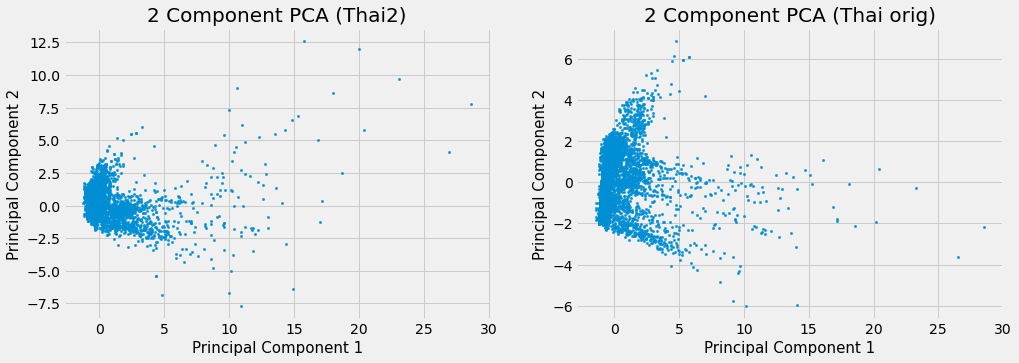

In [57]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA (Thai2)', fontsize = 20)

ax.scatter(Thai2_2PCA['principal component 1'], 
           Thai2_2PCA['principal component 2'],
           s = 5);

ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA (Thai orig)', fontsize = 20)

ax.scatter(Thai_2PCA['principal component 1'], 
           Thai_2PCA['principal component 2'],
           s = 5);


### K means

In [58]:
kmeans2 = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

kmeans2.fit(x_Thai2_scaled)

KMeans(init='random', n_clusters=3, random_state=42)

In [59]:
kmeans2.inertia_

62077.68282168103

In [60]:
Thai2_labels = kmeans2.labels_
Thai2_labels

array([2, 0, 2, ..., 0, 0, 0])

#### Mètode elbow per Thai2

In [61]:
kmeans2_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Aqui obtindrem a llista del valors de SSE per cada k (ente 1 i 15)
sse2 = []
for k in range(1, 15):
    kmeans2 = KMeans(n_clusters=k, **kmeans2_kwargs)
    kmeans2.fit(x_Thai2_scaled)
    sse2.append(kmeans2.inertia_)

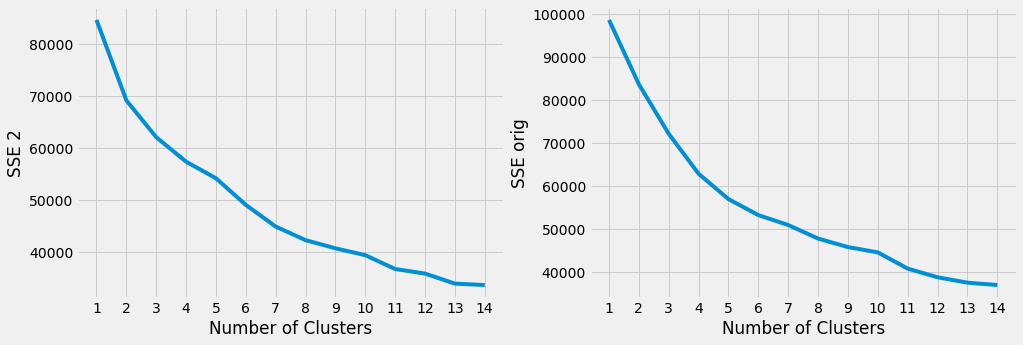

In [62]:
# fem una gràfica SSE vs numero de clusters
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,2,1) 
plt.plot(range(1, 15), sse2)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE 2")
# plt.show()

ax = fig.add_subplot(1,2,2)
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE orig")
plt.show()

In [63]:
# Calculem el elbow
kl = KneeLocator(range(1, 15), sse2, curve="convex", direction="decreasing")

kl.elbow

7

#### Calculem el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [64]:
# Fem una llista per tots el valors de silhouette que calcularem
silhouette_coefficients = []

# Fem un loop per calcular els coeficients de silhouette. 
# Començarem pel 3 ja que amb 2 dona un valor significativament més alt que la resta
# I voldriem veure en detall que pasa amb 3 o més clústers
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_Thai2_scaled)
    score = silhouette_score(x_Thai2_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

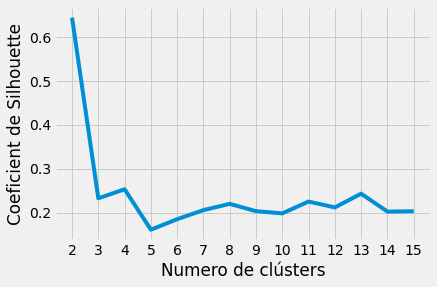

In [65]:
# plt.style.use("fivethirtyeight")
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Numero de clústers")
plt.ylabel("Coeficient de Silhouette")
plt.show()

#### Comentari final a l'adenda
Es pot veure que el coeficient de silouette s'estabilitza al voltant de 0.2. Es molt semblant al que vam obtenir amb totes les dades. En conseqüencia no crec que valgui la pena continuar.